<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/ZA01b_RegressionModels_HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model For Housing Dataset

The Dataset can be downloaded from kaggle website https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv

The task is to provide a machine learning model with Linear Regression model to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The dataset contains the following features:
- Price - Price of the houses (Target Feature).
- Area - Area of the house.
- Bedrooms - Number of bedrooms in the house.
- bathrooms - Number of bathrooms in the house.
- Stories - Number of House Stories.
- Mainroad - Road network to the house.
- Guestroom - The availability of guestroom in the house.
- Basement - The availability of basement in the house.
- HotWaterHeating - The availability of hot water heater in the house.
- Air Conditioning - The availability of air conditioning in the house.
- Parking - The availability of parking in the house.
- Prefarea - The availability of prefarea in the house.
- Furnishingstatus - The availability of furnish, semifurnish, no furnish

In [1]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
house_df = pd.read_csv('/content/Housing.csv') # reading the dataset to pandas
house_df.head() # Display the first few roles of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
house_df.shape # Number of Observation & Features

(545, 13)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
house_df.isna().sum() # Checking for missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
pd.set_option('display.max_rows', None)

## Feature Engineering

In [8]:
cat_col =[col for col in house_df.columns if house_df[col].dtypes=='O']
cat_col # Categorical columns in the datasets

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [9]:
for col in cat_col:  # Unique values in each categorical features
  print(col, len(house_df[col].unique()))

mainroad 2
guestroom 2
basement 2
hotwaterheating 2
airconditioning 2
prefarea 2
furnishingstatus 3


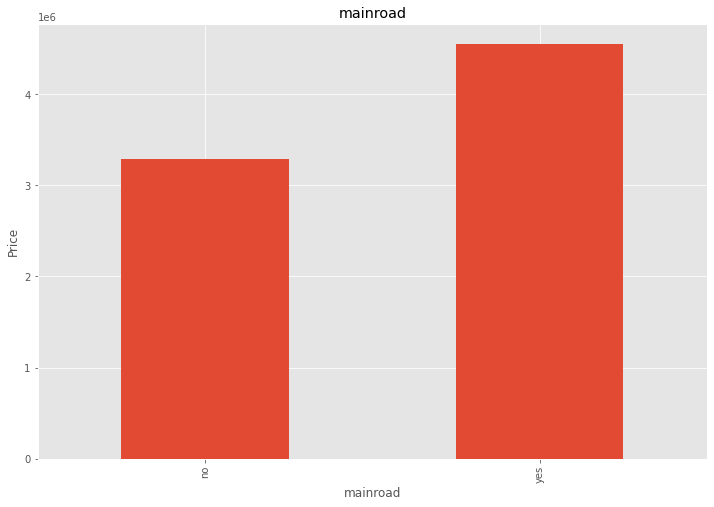

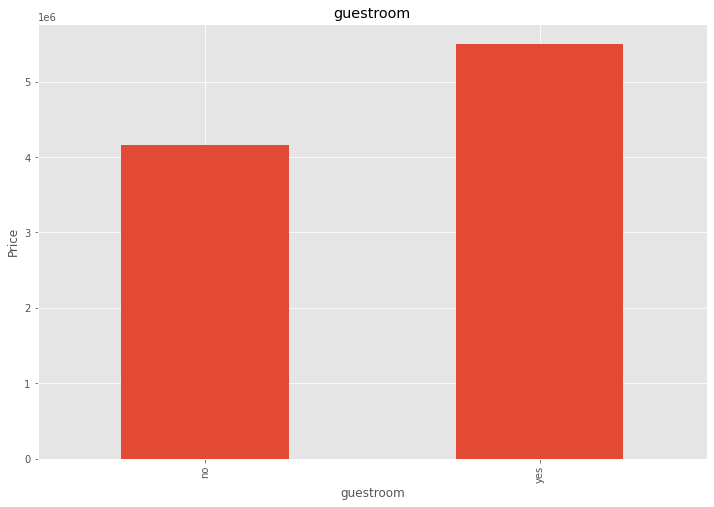

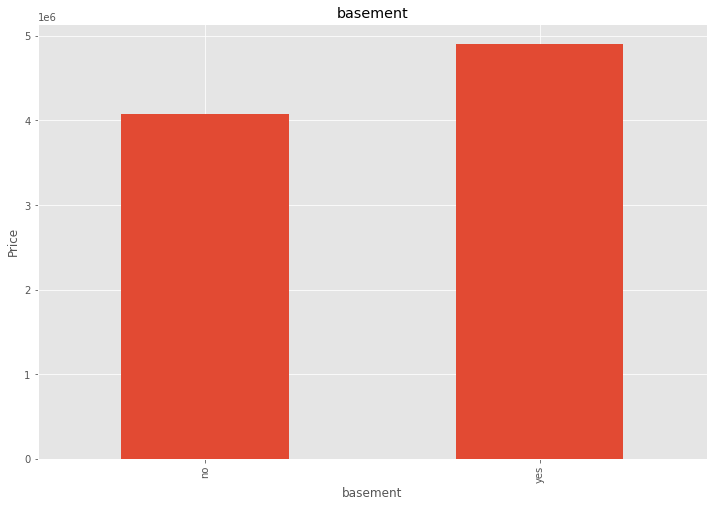

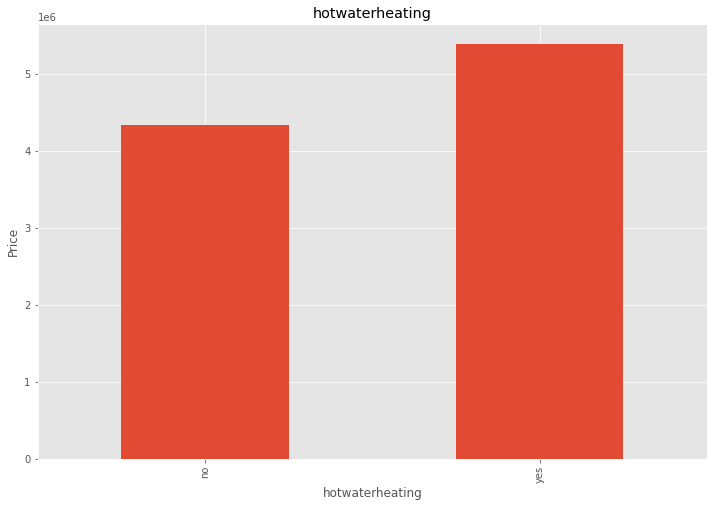

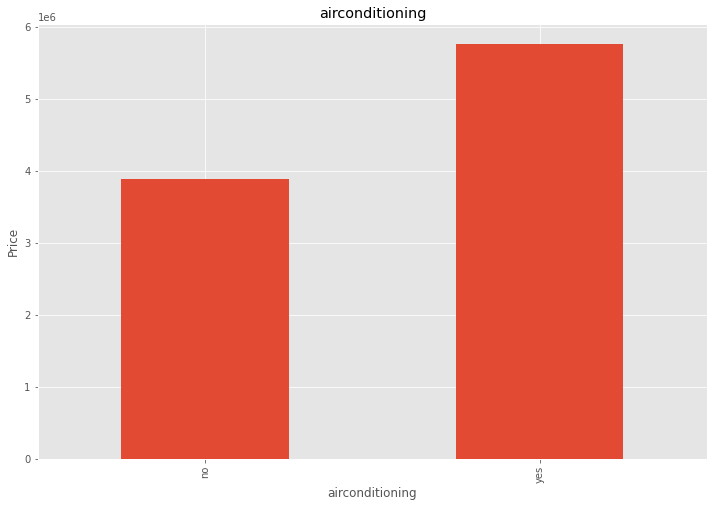

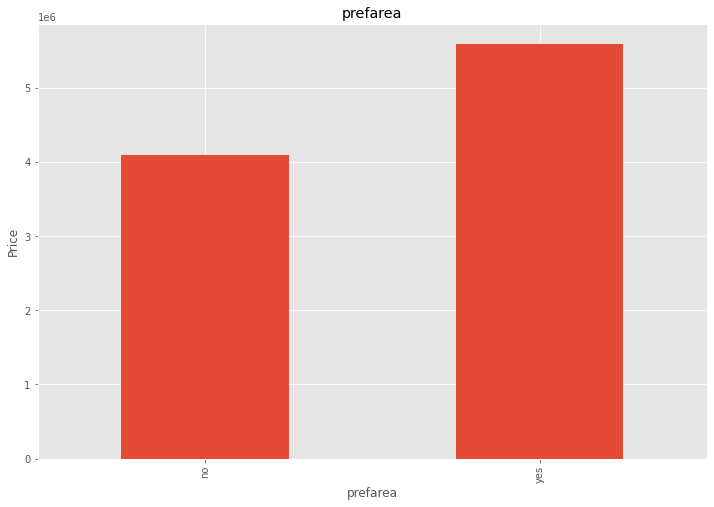

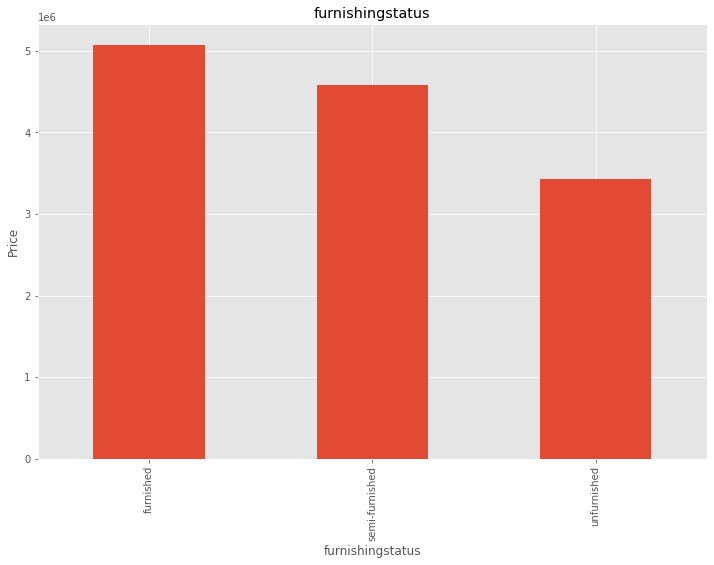

In [11]:
for col in cat_col:
    # Ploting the relationship between the categorical features and the target features
    house_df.groupby(col)['price'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

In [12]:
num_col = [col for col in house_df.columns if house_df[col].dtypes != 'O'] # Numerical Column

num_col

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [13]:
house_df[num_col].head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


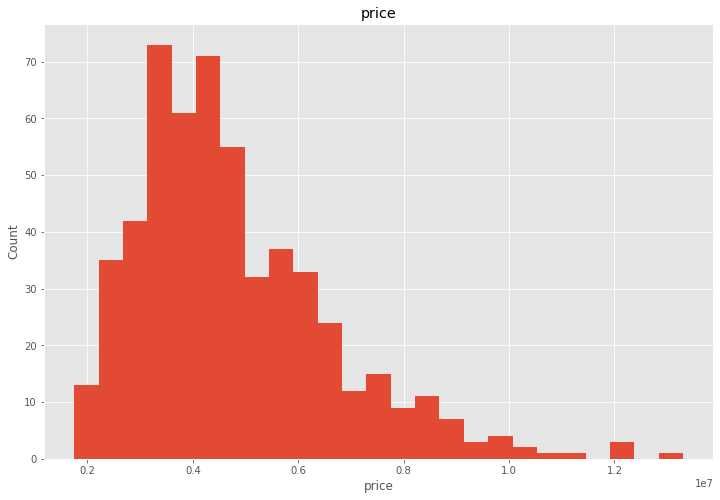

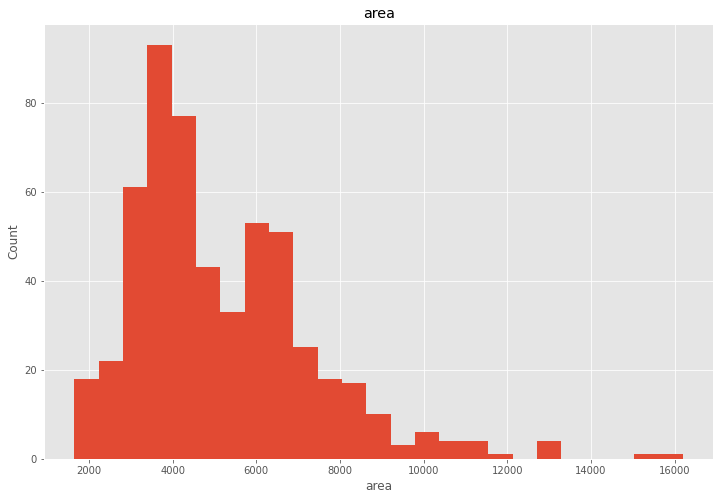

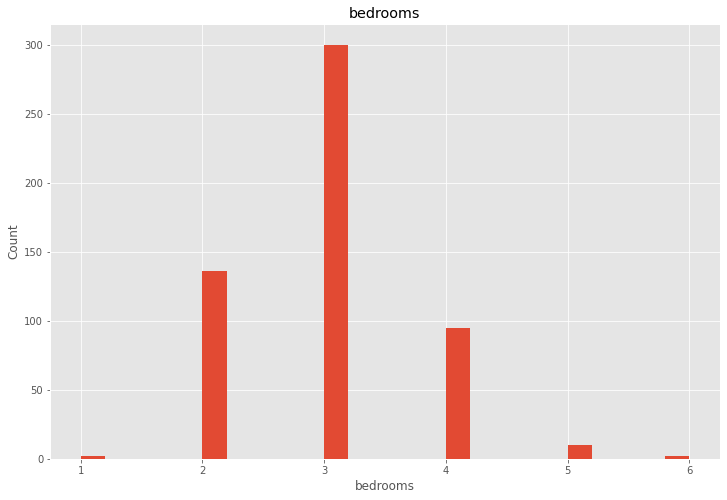

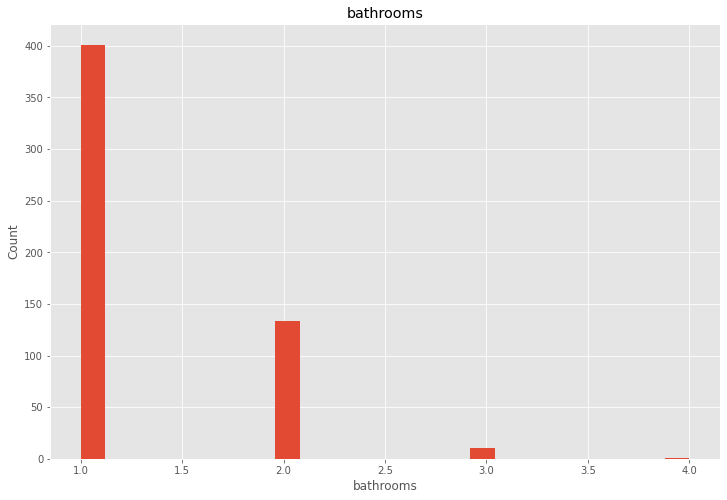

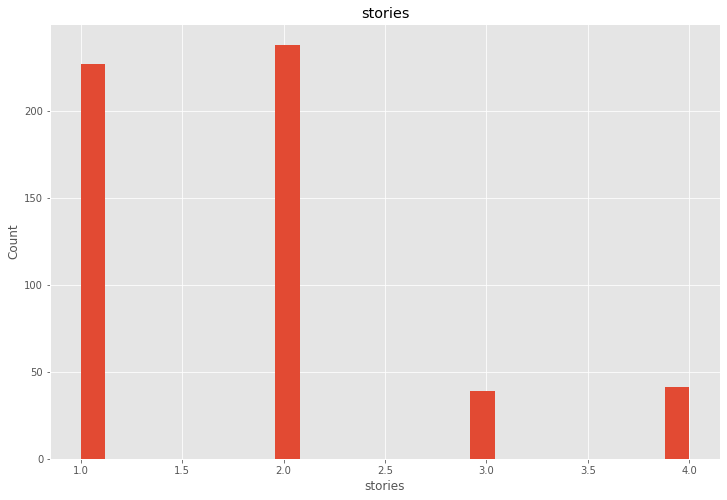

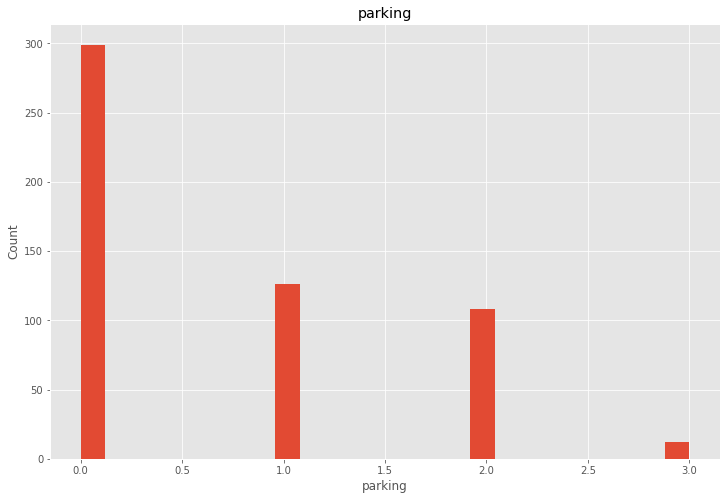

In [14]:
for col in num_col: # Distribution plot with an histogram on the numerical columns
  house_df[col].hist(bins=25)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(col)
  plt.show()

In [15]:
for col in ['price', 'area']: # With the help of the logrithm to recaculate the features from skewed distribution to a uniform distribution
    house_df[col]= np.log2(house_df[col])

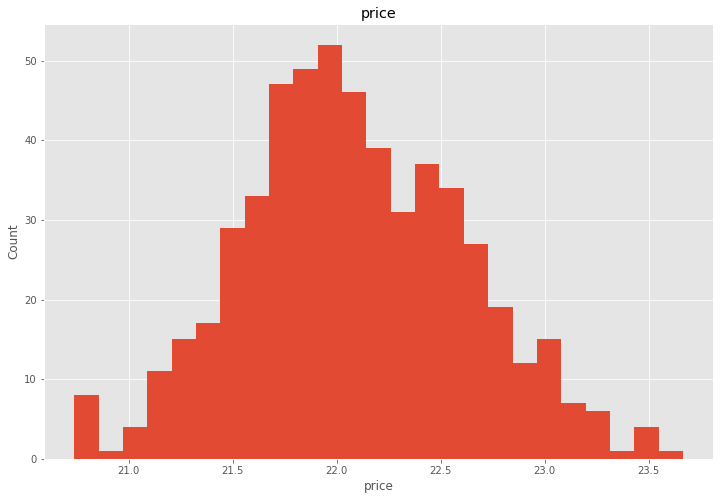

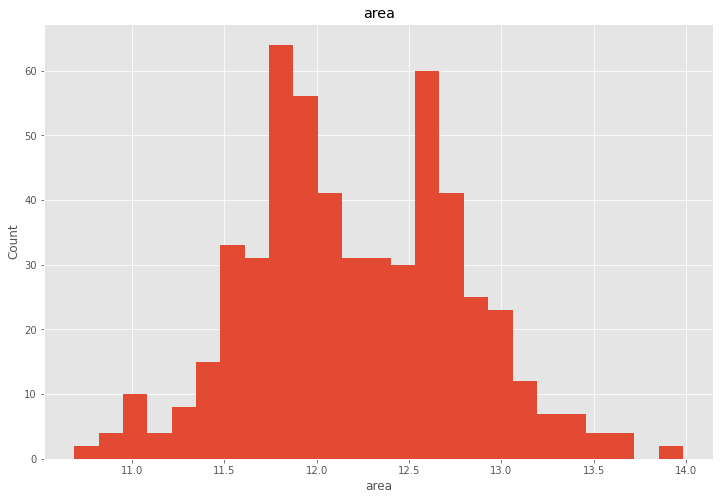

In [16]:
for col in ['price', 'area']: # Distribution plot with an histogram on the features to check for their uniform distribution
  house_df[col].hist(bins=25)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(col)
  plt.show()

In [ ]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,23.664923,12.857203,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,23.546278,13.129283,4,4,4,yes,no,no,no,yes,3,no,furnished
2,23.546278,13.281930,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,23.542151,12.872675,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,23.443795,12.857203,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
for col in cat_col: # Encoding the categorical features to numerical features
    labels_ordered=house_df.groupby([col])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    house_df[col]=house_df[col].map(labels_ordered)


In [18]:
house_df[cat_col].head(20)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,2
1,1,0,0,0,1,0,2
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,2
4,1,1,1,0,1,0,2
5,1,0,1,0,1,1,1
6,1,0,0,0,1,1,1
7,1,0,0,0,0,0,0
8,1,1,1,0,1,1,2
9,1,1,0,0,1,1,0


In [ ]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,23.664923,12.857203,4,2,3,1,0,0,0,1,2,1,2
1,23.546278,13.129283,4,4,4,1,0,0,0,1,3,0,2
2,23.546278,13.281930,3,2,2,1,0,1,0,0,2,1,1
3,23.542151,12.872675,4,2,2,1,0,1,0,1,3,1,2
4,23.443795,12.857203,4,1,2,1,1,1,0,1,2,0,2


In [19]:
scale_col = [col for col in house_df.columns if col not in ['price']]
# Standardizing the datasets to rescale the features to have a mean and varience of 0 and 1 respectively
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(house_df[scale_col])

MinMaxScaler()

In [21]:
scaler.transform(house_df[scale_col])

array([[0.65816483, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        1.        ],
       [0.74072687, 0.6       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.78704732, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.34396566, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24838843, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37093272, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
# transform the scaled features back from array to dataframe
final_data = pd.concat([house_df[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(house_df[scale_col]), columns=scale_col)],
                    axis=1)

In [23]:
final_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,23.664923,0.658165,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,23.546278,0.740727,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,23.546278,0.787047,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,23.542151,0.662860,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,23.443795,0.658165,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


## Developing Machine learning Models

In [24]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn import metrics

In [25]:
from sklearn.model_selection import train_test_split # Spliting the dataset into input and ouput or features and target
X = final_data.drop(['price'], axis=1) # Features
Y = final_data['price'] # Target
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, random_state = 12) # Spliting the dataset into 80% train and 20% test

In [26]:
sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_model.fit(X_train, Y_train) # This model helps to identify the best selections of features for developing the model with good accuracy

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [28]:
sel_model.get_support() # Array of features that can work well for 'True' and 'False' for otherwise i.e for this case all features can work postively to build our model

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [29]:
selected_feat = X_train.columns[(sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_model.estimator_.coef_ == 0)))

total features: 12
selected features: 12
features with coefficients shrank to zero: 0


In [30]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [31]:
model = LinearRegression() # Instanstiating the linear regression model for use
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
X_train_prediction = model.predict(X_train)
error_score = metrics.r2_score(Y_train, X_train_prediction)
print('R square error : ', error_score)

R square error :  0.6797605157668001


In [33]:
X_test_prediction = model.predict(X_test)
error_score1 = metrics.r2_score(Y_test, X_test_prediction)
print('R square error : ', error_score1)

R square error :  0.7465028531380632


In [34]:
from sklearn.ensemble import RandomForestRegressor # Instanstiating the Random Forest Regression model for use
forest_model = RandomForestRegressor()
forest_model.fit(X_train, Y_train) 

RandomForestRegressor()

In [35]:
from sklearn.metrics import mean_absolute_error
pred = forest_model.predict(X_train)
mean_absolute_error(Y_train, pred)

0.09362452026738192

In [36]:
forest_model.score(X_train, Y_train)

0.940546920529475

In [37]:
pred = forest_model.predict(X_test)
mean_absolute_error(Y_test, pred)

0.2587957158630611

In [38]:
forest_model.score(X_test, Y_test)

0.6865768083664785

In [39]:
from xgboost import XGBRegressor # Instanstiating the XGB Regression model for use
X_model = XGBRegressor()

In [40]:
X_model.fit(X_train, Y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
X_train_prediction = X_model.predict(X_train)
score1 = metrics.r2_score(Y_train, X_train_prediction)

score2 = metrics.mean_absolute_error(Y_train, X_train_prediction)

print('R square error : ', score1)
print('Mean Absolute error : ', score2)

R square error :  0.992160003966278
Mean Absolute error :  0.028737723098458737


In [42]:
X_test_prediction = X_model.predict(X_test)
score3 = metrics.r2_score(Y_test, X_test_prediction)

score4 = metrics.mean_absolute_error(Y_test, X_test_prediction)

print('R square error : ', score3)
print('Mean Absolute error : ', score4)

R square error :  0.6323196373340463
Mean Absolute error :  0.26479654052327267


In [43]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=5)
ridge.fit(X_train, Y_train)

Ridge(alpha=5)

In [44]:
training_ridge = ridge.score(X_train, Y_train)
print("training accuracy with ridge ",training_ridge )

training accuracy with ridge  0.6684399103110075


In [45]:
test_ridge = ridge.score(X_test, Y_test)
print("training accuracy with ridge ",test_ridge )

training accuracy with ridge  0.7115012474021782


## Conclusion

In the bid to get build a model that can produce the best accuracy, I tried out other regressor models with the housing dataset.

The Linear and Ridge Regressors were able to provide us good test accuracies of 73.6% while other regressors such as Random Forest Regressor and the XGBRegressor provided a training accuracies of 99% but a lower test accuracies of 66% which shows an overfitting in the models.

After careful consideration of these models, I can only produce a good Linear Regression model accuracy of ~75% owning to the fact that the model was built with small amount of observation and features. 545 observations and 12 features which were quite small for our model to further provide the 75% accuracy.

Next is to deploy the model to an API.
